In [1]:
from sdv.single_table import TVAESynthesizer
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from table_evaluator import TableEvaluator
from pycaret.classification import *

In [2]:
real_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
# Create metadata for the dataset
metadata = SingleTableMetadata()

# Fit metadata to the real dataset
metadata.detect_from_dataframe(data=real_data)

In [5]:
real_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
real_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
# Names of the columns that are discrete
discrete_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

synthesizer = TVAESynthesizer(
    metadata,                   # required metadata object
    enforce_min_max_values=True,  # Ensures synthetic numerical values lie within the real data ranges
    enforce_rounding=False,       # Adjust rounding behavior (set to True if you want the same decimals)
    epochs=500,                   # Number of training epochs; adjust based on dataset complexity
    verbose=False,                # Set to True to see training progress
    cuda=True                     # Use GPU acceleration if available
)

synthesizer.fit(real_data)

synthetic_data = synthesizer.sample(num_rows=299)


In [8]:
synthetic_data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,56.633491,1,46,1,46,0,226666.198262,1.331284,142,0,0,266,0
1,50.542608,0,71,0,42,0,185872.713472,0.840704,134,1,1,232,0
2,57.677431,1,167,1,36,0,255883.367443,0.997891,145,0,0,21,0
3,49.964718,0,259,0,40,0,207920.093853,0.714416,134,1,0,241,0
4,64.862452,0,502,1,32,0,201596.957387,1.107789,134,0,0,163,0


In [9]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 1630.85it/s]|
Column Shapes Score: 88.14%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:00<00:00, 219.79it/s]|
Column Pair Trends Score: 74.26%

Overall Score (Average): 81.2%



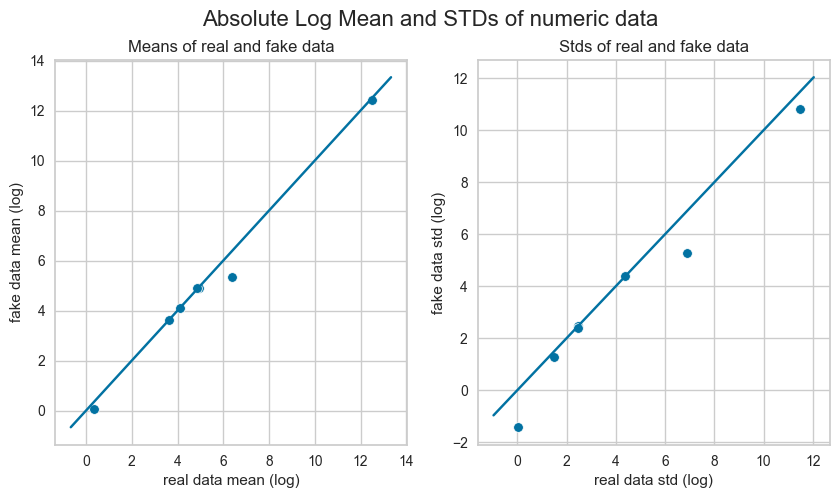

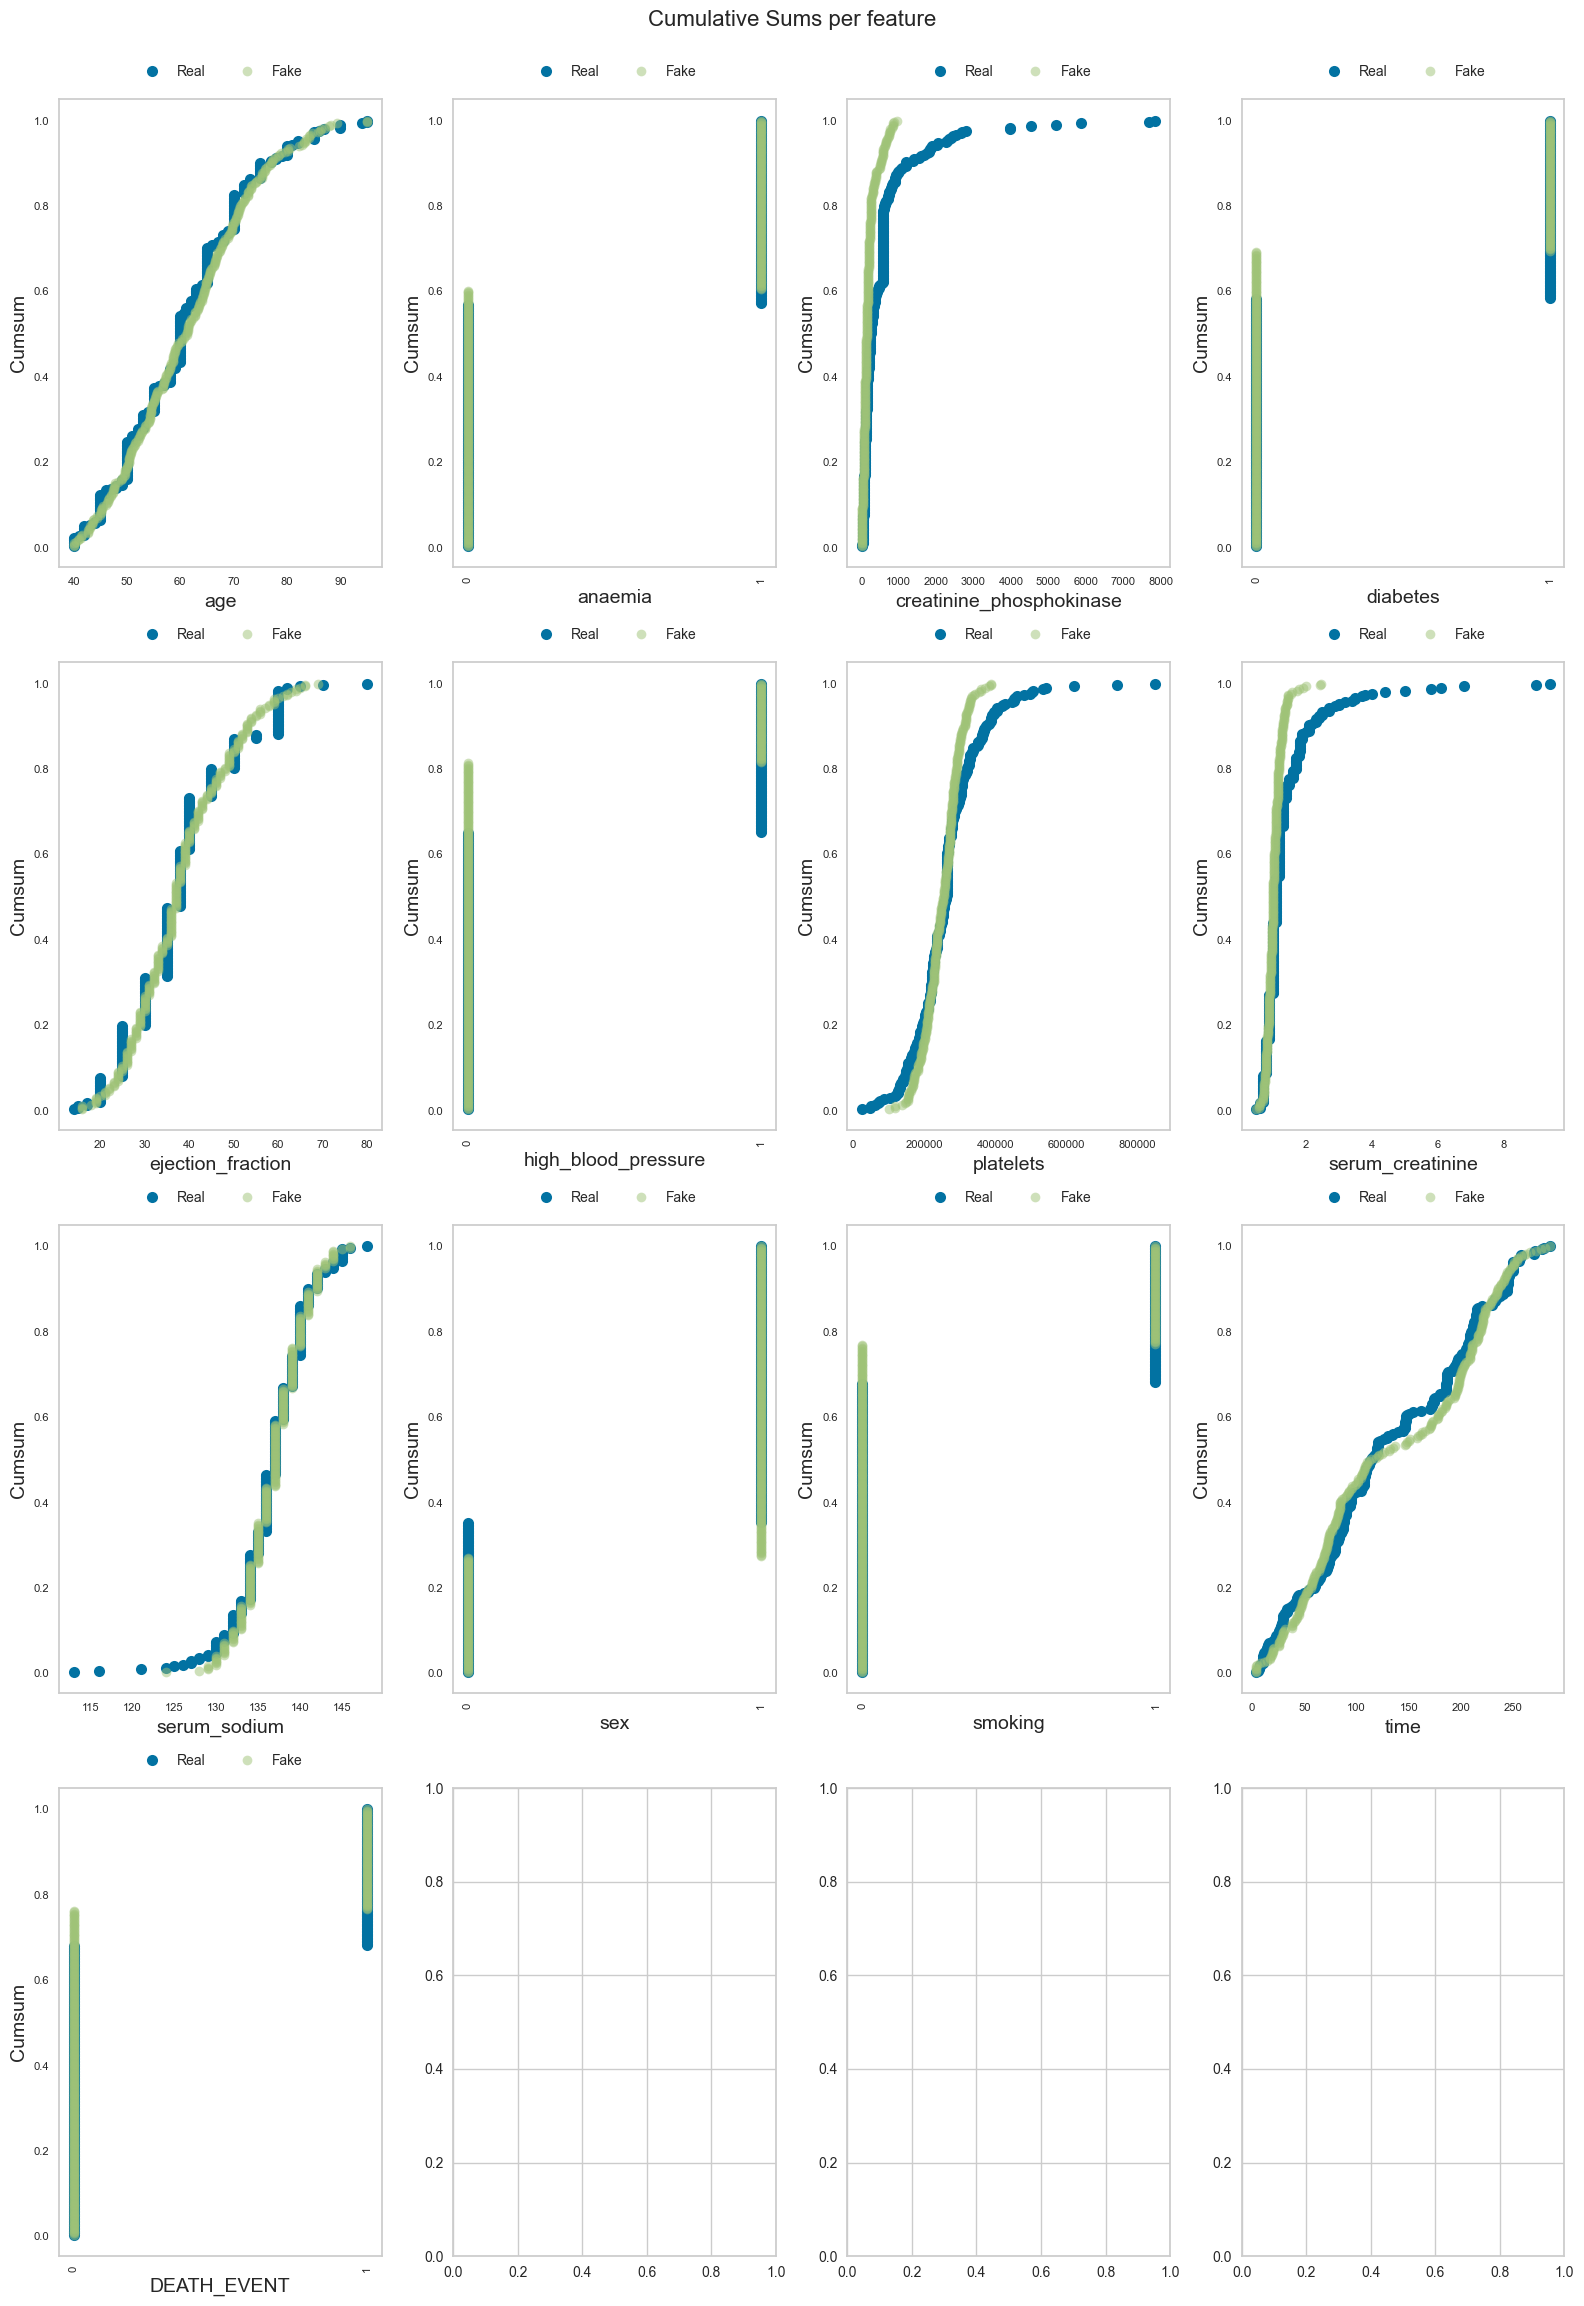

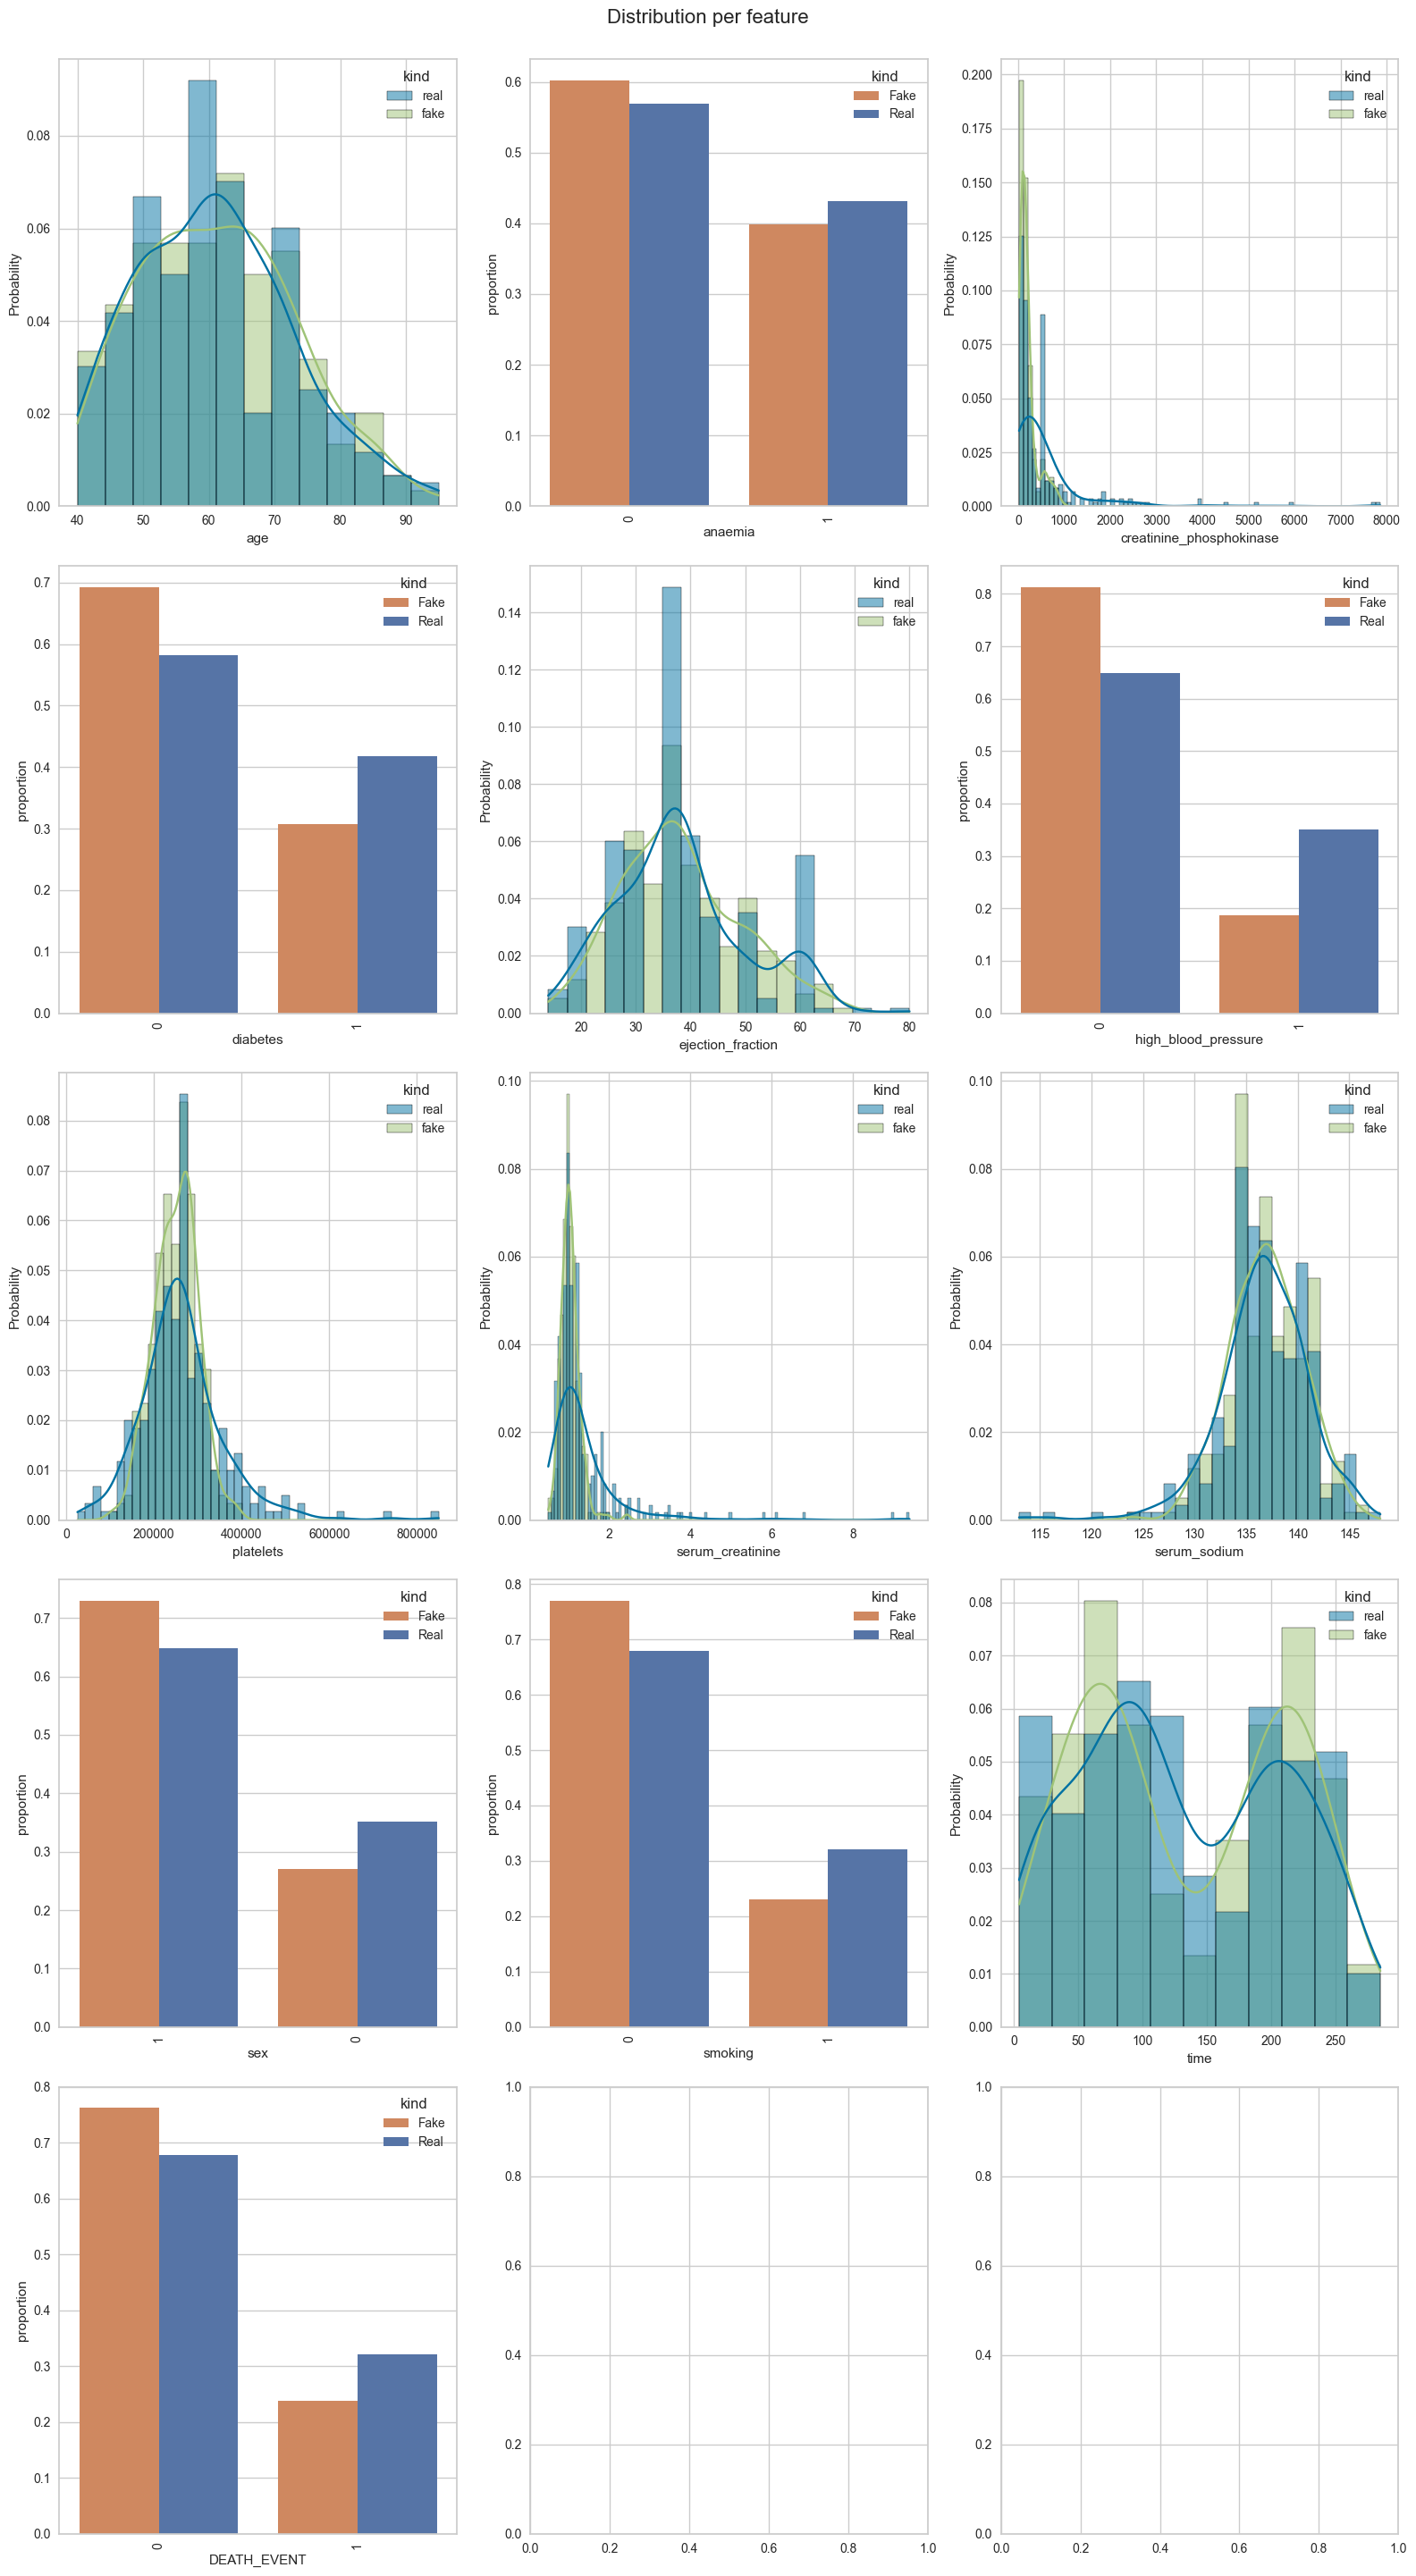

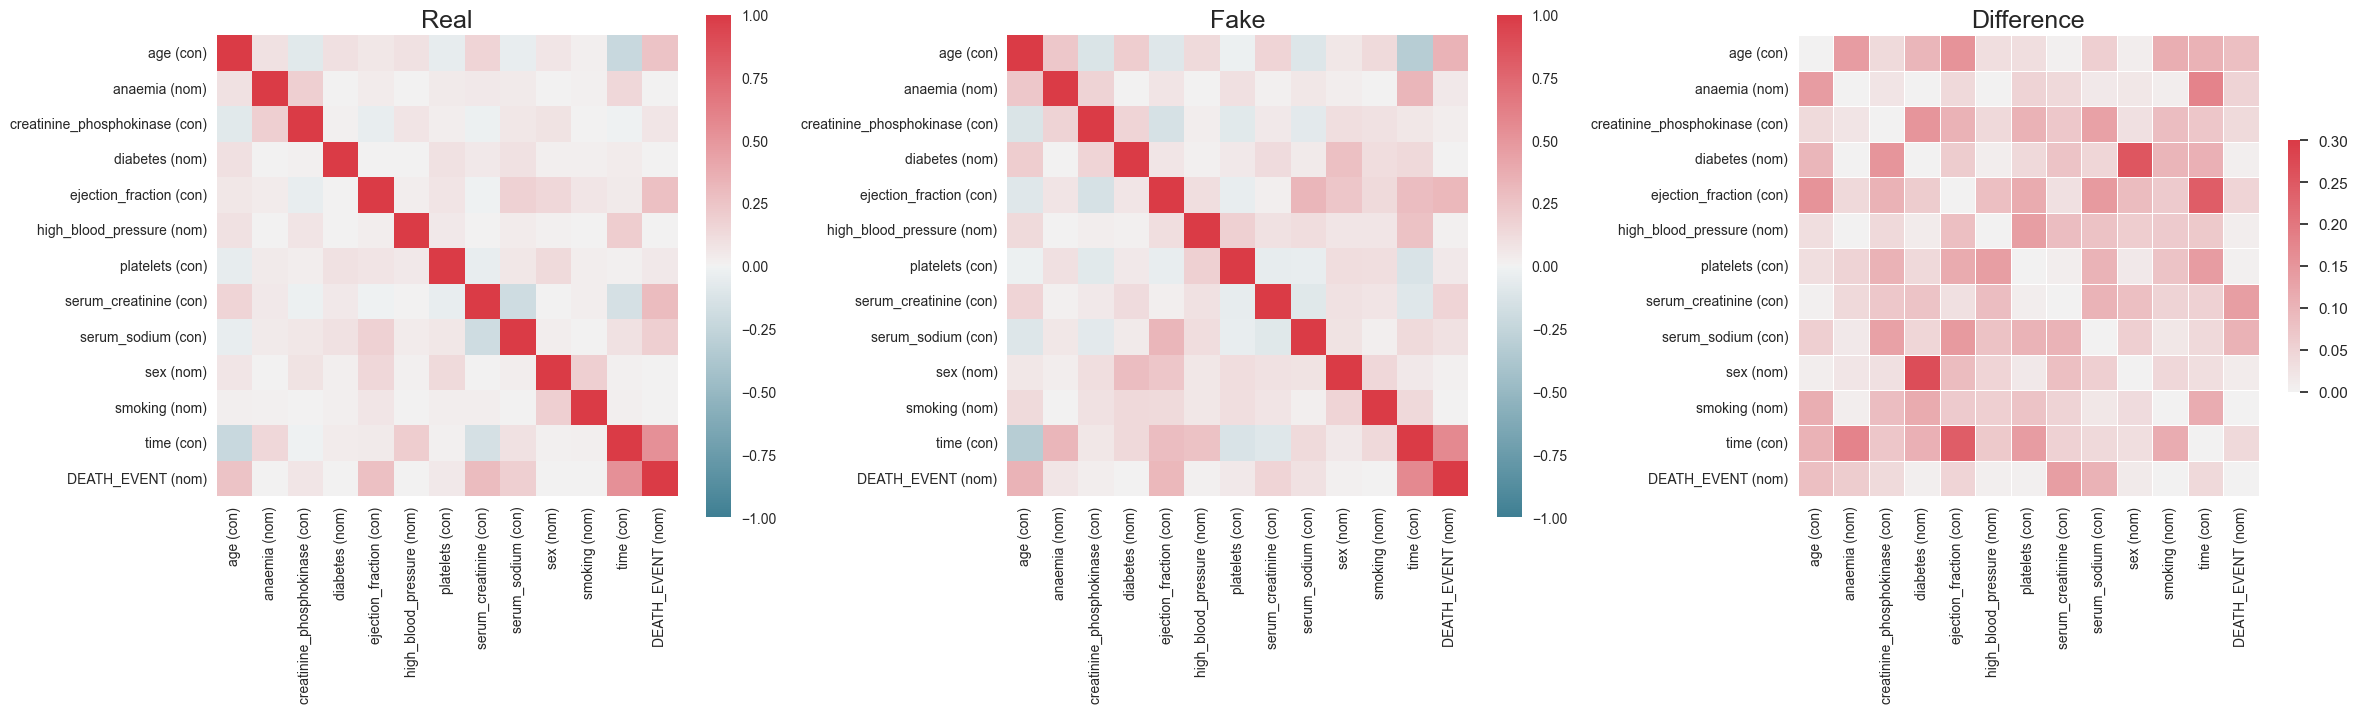

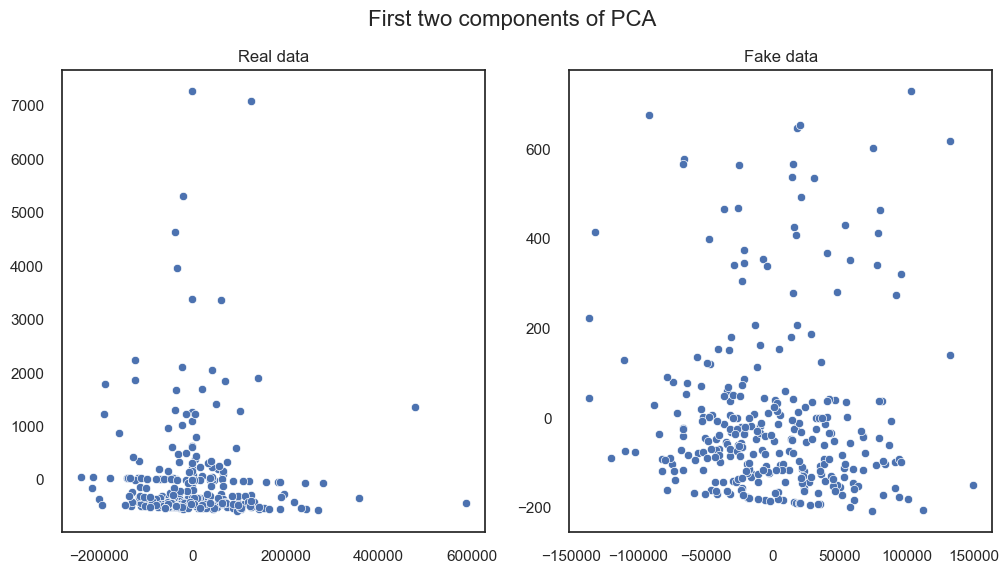

In [10]:
table_evaluator = TableEvaluator(real_data, synthetic_data, cat_cols = discrete_columns)
table_evaluator.visual_evaluation()

In [11]:
from pycaret.classification import *

In [12]:
s = setup(data=synthetic_data, target = 'DEATH_EVENT', test_data=real_data, index=False, session_id = 123)

,Description,Value
0,Session id,123
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(598, 13)"
4,Transformed data shape,"(598, 13)"
5,Transformed train set shape,"(299, 13)"
6,Transformed test set shape,"(299, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [13]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8561,0.9303,0.6768,0.7383,0.6888,0.5983,0.6127,0.0310
gbc,Gradient Boosting Classifier,0.8497,0.9087,0.6196,0.7567,0.6580,0.5654,0.5865,0.0200
nb,Naive Bayes,0.8466,0.9160,0.7893,0.6840,0.7219,0.6215,0.6322,0.0060
rf,Random Forest Classifier,0.8397,0.9173,0.5911,0.7500,0.6402,0.5406,0.5613,0.0260
qda,Quadratic Discriminant Analysis,0.8395,0.8871,0.6464,0.7039,0.6485,0.5488,0.5663,0.0050
ada,Ada Boost Classifier,0.8362,0.8741,0.6071,0.6998,0.6311,0.5291,0.5435,0.0150
lr,Logistic Regression,0.8329,0.9159,0.6196,0.7044,0.6273,0.5251,0.5495,0.3020
lda,Linear Discriminant Analysis,0.8329,0.9145,0.6339,0.6900,0.6368,0.5319,0.5510,0.0060
ridge,Ridge Classifier,0.8295,0.9145,0.5768,0.6944,0.6002,0.4984,0.5225,0.0060
et,Extra Trees Classifier,0.8293,0.9140,0.5321,0.7095,0.5818,0.4807,0.5032,0.0240


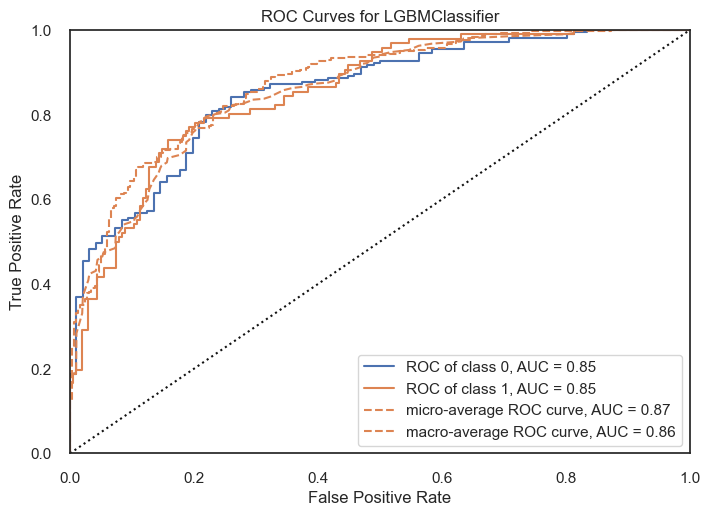

In [14]:
plot_model(best, plot = 'auc')

In [15]:
s = setup(real_data, target = 'DEATH_EVENT', session_id = 123)

,Description,Value
0,Session id,123
1,Target,DEATH_EVENT
2,Target type,Binary
3,Original data shape,"(299, 13)"
4,Transformed data shape,"(299, 13)"
5,Transformed train set shape,"(209, 13)"
6,Transformed test set shape,"(90, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [16]:
# functional API
best_real = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8181,0.9258,0.6595,0.7976,0.6804,0.5635,0.5916,0.0390
et,Extra Trees Classifier,0.8088,0.8891,0.5548,0.8342,0.6383,0.5214,0.5524,0.0310
lightgbm,Light Gradient Boosting Machine,0.8040,0.8649,0.6119,0.7621,0.6562,0.5247,0.5465,0.0480
gbc,Gradient Boosting Classifier,0.7990,0.8702,0.6143,0.7835,0.6444,0.5138,0.5482,0.0260
lr,Logistic Regression,0.7902,0.8823,0.6310,0.7429,0.6597,0.5125,0.5332,0.0240
lda,Linear Discriminant Analysis,0.7855,0.8719,0.6310,0.7076,0.6519,0.5013,0.5137,0.0070
nb,Naive Bayes,0.7805,0.8355,0.4976,0.7083,0.5642,0.4393,0.4596,0.0080
ada,Ada Boost Classifier,0.7802,0.8264,0.5833,0.7251,0.6302,0.4778,0.4938,0.0220
ridge,Ridge Classifier,0.7712,0.8729,0.5857,0.6976,0.6190,0.4608,0.4771,0.0080
dt,Decision Tree Classifier,0.7557,0.7236,0.6381,0.6218,0.6204,0.4417,0.4499,0.0070


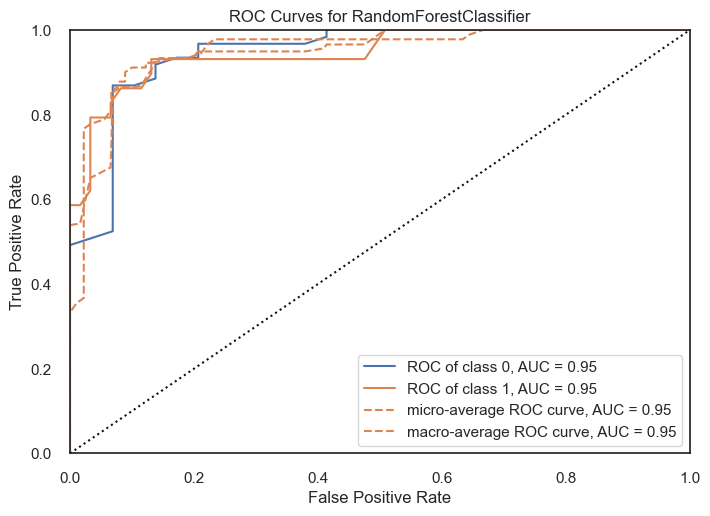

In [17]:
plot_model(best_real, plot = 'auc')